## 0. Introduction

The purpose of this notebook is to explore linear and logistic regression with reference to chapter 13 from *All of Statistics* (Wasserman, 2004).

## 1. Simple Linear Regression

**Regression** is a method for studying the relationship between a **response variable** $Y$ and a **covariate** $X$. The covariate is also called a **predictor variable** or a **feature**. One way to summarize the relationship between $X$ and $Y$ is through the regression function

$$ r(x) = \mathbb{E}(Y \mid X = x) = \int y \, f(y \mid x) \, dy. $$

Our goal is to estimate the regression function $r(x)$ from data of the form

$$ (Y_1, X_1), \ldots, (Y_n, X_n) \sim F_{X,Y}. $$

The simplest version of regression is when $X_i$ is simple (one-dimensional) and $r(x)$ is assumed to be linear:

$$ r(x) = \beta_0 + \beta_1 x. $$

This model is called the simple linear regression model. We will make the further simplifying assumption that $\mathbb{V}(\epsilon_i \mid X = x) = \sigma^2$ does not depend on $x$. We can thus write the **simple linear regression model** as

$$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i $$

where $\mathbb{E}(\epsilon_i \mid X_i) = 0$ and $\mathbb{V}(\epsilon_i \mid X_i) = \sigma^2$.

<center><img src="../figures/simple_linear_reg.png" width="350" height="300"/></center>

The unknown parameters in the model are the intercept $\beta_0$ and the slope $\beta_1$ and the variance $\sigma^2$. Let $\widehat{\beta}_0$ and $\widehat{\beta}_1$ denote estimates of $\beta_0$ and $\beta_1$. The **fitted line** is

$$ \widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x. $$

The **predicted values** or **fitted values** are $\widehat{Y}_i = \widehat{r}(X_i)$ and the **residuals** are defined to be

$$ \widehat{\epsilon}_i = Y_i - \widehat{Y}_i = Y_i - \left(\widehat{\beta}_0 + \widehat{\beta}_1 X_i\right). $$

The residual sums of squares or RSS, which measures how well the line fits the data, is defined by $\text{RSS} = \sum_{i=1}^n \widehat{\epsilon}_i^2$.

The **least squares estimates** are the values $\widehat{\beta}_0$ and $\widehat{\beta}_1$ that minimize RSS. The least squares estimates are given by

$$ \widehat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X}_n)(Y_i - \bar{Y}_n)}{\sum_{i=1}^n (X_i - \bar{X}_n)^2} $$

$$ \widehat{\beta}_0 = \bar{Y}_n - \widehat{\beta}_1 \bar{X}_n. $$

An unbiased estimate of $\sigma^2$ is

$$ \widehat{\sigma}^2 = \left(\frac{1}{n - 2}\right) \sum_{i=1}^n \widehat{\epsilon}_i^2. $$

Note: inferences from linear regression are most accurate when the residuals behave like random normal numbers.

Let's consider an example in Python.

In [1]:
import numpy as np
import scipy.stats as ss
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
n = 100
X = ss.uniform.rvs(loc=0, scale=10, size=n, random_state=42)
true_beta0, true_beta1 = 2, 3
true_var = 1
epsilon = ss.norm.rvs(loc=0, scale=np.sqrt(true_var), size=n, random_state=42)
Y = true_beta0 + true_beta1 * X + epsilon

In [3]:
# Compute least squares estimates
X_mean, Y_mean = np.mean(X), np.mean(Y)
ols_beta1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
ols_beta0 = Y_mean - ols_beta1 * X_mean

# Compute fitted values and residuals
ols_Y = ols_beta0 + ols_beta1 * X
ols_resids = Y - ols_Y
ols_RSS = np.sum(ols_resids**2)
ols_var_hat = (1 / (n - 2)) * ols_RSS

# Print results
print(f"True β0 = {true_beta0}, Estimated β0 = {ols_beta0:.3f}")
print(f"True β1 = {true_beta1}, Estimated β1 = {ols_beta1:.3f}")
print(f"Residual Sum of Squares (RSS) = {ols_RSS:.3f}")
print(f"True σ² = {true_var}, Unbiased estimate of σ² = {ols_var_hat:.3f}")

True β0 = 2, Estimated β0 = 1.707
True β1 = 3, Estimated β1 = 3.040
Residual Sum of Squares (RSS) = 80.228
True σ² = 1, Unbiased estimate of σ² = 0.819


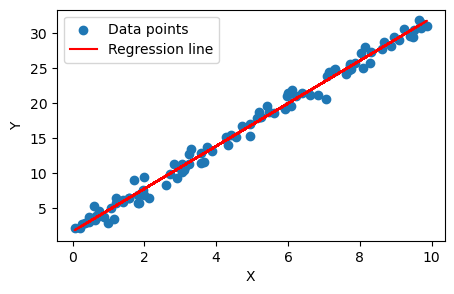

In [4]:
# Plot the data and the fitted line
plt.figure(figsize=(5,3))
plt.scatter(X, Y, label='Data points')
plt.plot(X, ols_Y, color='red', label='Regression line')
plt.xlabel('X'), plt.ylabel('Y')
plt.legend()
plt.show()

## 2. Least Squares and Maximum Likelihood

Suppose we add the assumption that $\epsilon_i \mid X_i \sim N(0, \sigma^2)$, that is,

$$ Y_i \mid X_i \sim N(\mu_i, \sigma^2) $$

where $\mu_i = \beta_0 + \beta_1 X_i$. The likelihood function is

$$
\begin{aligned}
\prod_{i=1}^n f(X_i, Y_i) &= \prod_{i=1}^n f_X(X_i) f_{Y \mid X}(Y_i \mid X_i) \\
&= \prod_{i=1}^n f_X(X_i) \times \prod_{i=1}^n f_{Y \mid X}(Y_i \mid X_i) \\
&= \mathcal{L}_1 \times \mathcal{L}_2
\end{aligned}
$$

where $\mathcal{L}_1 = \prod_{i=1}^n f_X(X_i)$ and

$$ \mathcal{L}_2 = \prod_{i=1}^n f_{Y \mid X}(Y_i \mid X_i). $$

The term $\mathcal{L}_1$ does not involve the parameters $\beta_0$ and $\beta_1$. We shall focus on the second term $\mathcal{L}_2$, which is called the **conditional likelihood**, given by

$$
\mathcal{L}_2 \equiv \mathcal{L}(\beta_0, \beta_1, \sigma) = \prod_{i=1}^n f_{Y \mid X}(Y_i \mid X_i) \propto \sigma^{-n} \exp \left\{ -\frac{1}{2\sigma^2} \sum_{i} (Y_i - \mu_i)^2 \right\}.
$$

The conditional log-likelihood is

$$ \ell(\beta_0, \beta_1, \sigma) = -n \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^n \Big(Y_i - (\beta_0 + \beta_1 X_i)\Big)^2. $$

To find the MLE of $(\beta_0, \beta_1)$, we maximize $\ell(\beta_0, \beta_1, \sigma)$. From the equation above, we see that maximizing the likelihood is the same as minimizing the RSS: $\sum_{i=1}^n \Big(Y_i - (\beta_0 + \beta_1 X_i)\Big)^2.$ Therefore, we have shown that under the assumption of normality, the least squares estimator is also the maximum likelihood estimator.

We can also maximize $\ell(\beta_0, \beta_1, \sigma)$ over $\sigma$, yielding the MLE

$$ \widehat{\sigma}^2 = \frac{1}{n} \sum_{i} \widehat{\epsilon}_i^2. $$

This estimator is similar to, but not identical to, the unbiased estimator.

In [5]:
# Define the negative log-likelihood function
def negative_log_likelihood(params, X, Y):
    beta0, beta1, sigma = params
    mu = beta0 + beta1 * X
    n = len(Y)
    resids = Y - mu
    log_likelihood = -n * np.log(sigma) - (1 / (2 * sigma**2)) * np.sum(resids**2)
    return -log_likelihood

# Optimize the negative log-likelihood function
result = opt.minimize(negative_log_likelihood, x0=[0, 0, 1], args=(X, Y), 
                      bounds=[(None, None), (None, None), (1e-10, None)])
mle_beta0, mle_beta1, mle_sigma = result.x

# Compute fitted values and residuals
mle_Y = mle_beta0 + mle_beta1 * X
mle_resids = Y - mle_Y
mle_RSS = np.sum(mle_resids**2)
mle_var_hat = (1 / n) * mle_RSS

# Print results
print(f"True β0 = {true_beta0}, Estimated β0 = {mle_beta0:.3f}")
print(f"True β1 = {true_beta1}, Estimated β1 = {mle_beta1:.3f}")
print(f"Residual Sum of Squares (RSS) = {mle_RSS:.3f}")
print(f"True σ² = {true_var}, MLE estimate of σ² = {mle_var_hat:.3f}")

True β0 = 2, Estimated β0 = 1.707
True β1 = 3, Estimated β1 = 3.040
Residual Sum of Squares (RSS) = 80.228
True σ² = 1, MLE estimate of σ² = 0.802


## 3. Properties of the Least Squares Estimators

We now record the standard errors and limiting distribution of the least squares estimator. In regression problems, we usually focus on the properties of the estimators conditional on $X^n = (X_1, \ldots, X_n)$. Thus, we state the means and variances as conditional means and variances.

Let $\widehat{\beta}_T = (\widehat{\beta}_0, \widehat{\beta}_1)^T$ denote the least squares estimators. Then,

$$
\mathbb{E}(\widehat{\beta} \mid X^n) = \begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}
$$

$$
\mathbb{V}(\widehat{\beta} \mid X^n) = \frac{\sigma^2}{n \, s^2_{X}} \begin{pmatrix}
\frac{1}{n} \sum_{i=1}^n X_i^2 & -\bar{X}_n \\
-\bar{X}_n & 1
\end{pmatrix}
$$


where $s_X^2 = n^{-1} \sum_{i=1}^n (X_i - \bar{X}_n)^2$.

The estimated standard errors of $\widehat{\beta}_0$ and $\widehat{\beta}_1$ are obtained by taking the square roots of the corresponding diagonal terms of $\mathbb{V}(\widehat{\beta} \mid X_n)$ and inserting the estimate $\widehat{\sigma}$ for $\sigma$. 

In [6]:
# Compute standard errors
s_X2 = np.mean((X - X_mean)**2)
var_cov_matrix = (ols_var_hat / (n * s_X2)) * np.array([[np.mean(X**2), -X_mean], [-X_mean, 1]])
se_ols_beta0 = np.sqrt(var_cov_matrix[0, 0])
se_ols_beta1 = np.sqrt(var_cov_matrix[1, 1])

# Print results
print(f"Standard Error of β0: {se_ols_beta0:.3f}")
print(f"Standard Error of β1: {se_ols_beta1:.3f}")

Standard Error of β0: 0.170
Standard Error of β1: 0.031


In [7]:
# Confirm our results using statsmodels.api.OLS 
import statsmodels.api as sm

X_with_const = sm.add_constant(X)
ols = sm.OLS(Y, X_with_const)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9893.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          3.14e-100
Time:                        15:17:24   Log-Likelihood:                -130.88
No. Observations:                 100   AIC:                             265.8
Df Residuals:                      98   BIC:                             271.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7066      0.170     10.049      0.000       1.370       2.044
x1             3.0403      0.031     99.463      0.000       2.980       3.101
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.376
Skew:                          -0.146   Prob(JB):                        0.829
Kurtosis:                       2.926   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Prediction

Suppose we have estimated a regression model $\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x$ from data $(X_1, Y_1), \ldots, (X_n, Y_n)$. We observe the value $X = x_*$ of the covariate for a new subject and we want to predict their outcome $Y_*$. An estimate of $Y_*$ is

$$ \widehat{Y}_* = \widehat{\beta}_0 + \widehat{\beta}_1 x_*. $$

Using the formula for the variance of the sum of two random variables,

$$
\mathbb{V}(\widehat{Y}_*) = \mathbb{V}(\widehat{\beta}_0 + \widehat{\beta}_1 x_*) = \mathbb{V}(\widehat{\beta}_0) + x_*^2 \mathbb{V}(\widehat{\beta}_1) + 2 x_* \, \text{Cov}(\widehat{\beta}_0, \widehat{\beta}_1).
$$

The estimated standard error $\text{se}(\widehat{Y}_*)$ is the square root of this variance, with $\widehat{\sigma}^2$ in place of $\sigma^2$. However, the confidence interval for $Y_*$ is **not** of the usual form $\widehat{Y}_* \pm z_{\alpha/2} \text{se}(\widehat{Y}_*)$. The correct form of the confidence interval is given in the following theorem.

Let

$$ \hat{\xi}_n^2 = \widehat{\sigma}^2 \left( \frac{\sum_{i=1}^n (X_i - X_*)^2}{n \sum_{i} (X_i - \bar{X})^2} + 1 \right). $$

An approximate $1 - \alpha$ prediction interval for $Y_*$ is

$$ \widehat{Y}_{*} \pm z_{\alpha/2} \, \hat{\xi}_{n}. $$

In [8]:
# Compute prediction for a new x value
x_star = 7
Y_star = ols_beta0 + ols_beta1 * x_star
xi_n_squared = ols_var_hat * ((np.sum((X - x_star)**2) / (n * np.sum((X - X_mean)**2))) + 1)
se_Y_star = np.sqrt(xi_n_squared)
alpha = 0.05
z_alpha = ss.norm.ppf(1 - alpha / 2)
pred_int = (Y_star - z_alpha * se_Y_star, Y_star + z_alpha * se_Y_star)

print(f"Predicted Y = {Y_star:.3f} for x = {x_star}")
print(f"95% Prediction Interval for Y = ({pred_int[0]:.3f}, {pred_int[1]:.3f})")

Predicted Y = 22.989 for x = 7
95% Prediction Interval for Y = (21.201, 24.776)


## 5. Multiple Regression

Now suppose that the covariate is a vector of length $k$. The data are of the form

$$ (Y_1, X_1), \ldots, (Y_i, X_i), \ldots, (Y_n, X_n) $$

where

$$ X_i = (X_{i1}, \ldots, X_{ik}). $$

Here, $X_i$ is the vector of $k$ covariate values for the $i^\text{th}$ observation. The linear regression model is

$$ Y_i = \sum_{j=1}^k \beta_j X_{ij} + \epsilon_i $$

for $i = 1, \ldots, n$, where $\mathbb{E}(\epsilon_i \mid X_{i1}, \ldots, X_{ik}) = 0$. Usually, we want to include an intercept in the model, which we can do by setting $X_{i1} = 1$ for $i = 1, \ldots, n$. At this point, it will be more convenient to express the model in matrix notation. The outcomes will be denoted by

$$
Y = 
\begin{pmatrix}
Y_1 \\
Y_2 \\
\vdots \\
Y_n
\end{pmatrix}
$$

and the covariates will be denoted by

$$
X = 
\begin{pmatrix}
X_{11} & X_{12} & \cdots & X_{1k} \\
X_{21} & X_{22} & \cdots & X_{2k} \\
\vdots & \vdots & \vdots & \vdots \\
X_{n1} & X_{n2} & \cdots & X_{nk}
\end{pmatrix}.
$$

Each row is one observation; the columns correspond to the $k$ covariates. Thus, $X$ is a $(n \times k)$ matrix. Let

$$
\beta = 
\begin{pmatrix}
\beta_1 \\
\vdots \\
\beta_k
\end{pmatrix}
\quad \text{and} \quad
\epsilon = 
\begin{pmatrix}
\epsilon_1 \\
\vdots \\
\epsilon_n
\end{pmatrix}.
$$


Thus we can write

$$ Y = X \beta + \epsilon. $$

The form of the least squares estimate is given in the following theorem. Assuming that the $(k \times k)$ matrix $X^TX$ is invertible, 

$$ \widehat{\beta} = (X^T X)^{-1} X^T Y \quad $$

$$ \mathbb{V}(\widehat{\beta} \mid X_n) = \sigma^2 (X^T X)^{-1} \quad $$

$$ \widehat{\beta} \approx N(\beta, \sigma^2 (X^T X)^{-1}). $$

The estimated regression function is $\widehat{r}(x) = \sum_{j=1}^k \widehat{\beta}_j x_j$. An unbiased estimate of $\sigma^2$ is

$$ \widehat{\sigma}^2 = \left(\frac{1}{n - k}\right) \sum_{i=1}^n \widehat{\epsilon}_i^2 $$

where $\widehat{\epsilon} = X \widehat{\beta} - Y$ is the vector of residuals. An approximate $1 - \alpha$ confidence interval for $\beta_j$ is

$$ \widehat{\beta}_j \pm z_{\alpha/2} \widehat{\text{se}}(\widehat{\beta}_j) $$

where $\widehat{\text{se}}^2(\widehat{\beta}_j)$ is the $j^\text{th}$ diagonal element of the matrix $\widehat{\sigma}_{\widehat{}}^2 (X^T X)^{-1}$.

## 6. Model Selection

In model selection there are two problems: (i) assigning a "score" to each model which measures, in some sense, how good the model is, and (ii) searching through all the models to find the model with the best score.

The idea of **stepwise regression** is to build a regression model by adding/removing predictors step-by-step, until the pre-set significance level is met for all predictors. Each step in the stepwise regression procedure can be identified as "forward selection" or "backward selection", which mean adding a predictor or removing a existing predictor respectively.

**AIC (Akaike Information Criterion)** and **BIC (Bayesian information criterion)** are two important examples of criterion-based model selection approaches. AIC and BIC have two similar objective functions to minimize as shown below.

$$
\begin{align*}
\text{AIC} &= n \ln \left(\frac{\text{RSS}}{n} \right) + 2(k+1) \\
\text{BIC} &= n \ln \left(\frac{\text{RSS}}{n} \right) + (k+1) \ln n
\end{align*}
$$

where $n$ is the number of training data and $k$ is the number of covariates (or parameters). Both criteria help in model selection by balancing fit and complexity, but BIC generally imposes a stricter penalty for complexity, especially for larger sample sizes.

Another method is **$\mathbf{k}$-fold cross-validation**. Here we divide the data into $\mathrm{k}$ groups; often people take $\mathrm{k} = 10$. We omit one group of data and fit the models to the remaining data. We use the fitted model to predict the data in the group that was omitted. We then estimate the risk by $\sum_i(Y_i − \widehat{Y}_i)^2$ where the sum is over the the data points in the omitted group. This process is repeated for each of the $\mathrm{k}$ groups and the resulting risk estimates are averaged.

## 7. Logistic Regression

So far we have assumed that $Y_i$ is real valued. **Logistic regression** is a parametric method for regression when $Y_i \in \{0, 1\}$ is binary. For a $k$-dimensional covariate $X$, the model is

$$ p_i \equiv p_i(\beta) \equiv \mathbb{P}(Y_i = 1 \mid X = x) = \frac{e^{\beta_0 + \sum_{j=1}^k \beta_j x_{ij}}}{1 + e^{\beta_0 + \sum_{j=1}^k \beta_j x_{ij}}} $$

or, equivalently,

$$ \text{logit}(p_i) = \beta_0 + \sum_{j=1}^k \beta_j x_{ij} $$

where

$$ \text{logit}(p) = \log \left( \frac{p}{1 - p} \right). $$

The name "logistic regression" comes from the fact that $e^x / (1 + e^x)$ is called the logistic function. A plot of the logistic for a one-dimensional covariate is shown below.

<center><img src="../figures/logistic_reg.png" width="400" height="125"/></center>

Because the $Y_i$'s are binary, the data are Bernoulli:

$$ Y_i \mid X_i = x_i \sim \text{Bernoulli}(p_i). $$

Hence the (conditional) likelihood function is

$$ \mathcal{L}(\beta) = \prod_{i=1}^n p_i(\beta)^{Y_i} \, (1 - p_i(\beta))^{1 - Y_i}. $$

The MLE $\widehat{\beta}$ has to be obtained by maximizing $\mathcal{L}(\beta)$ numerically. There is a fast numerical algorithm called reweighted least squares, the details of which are outlined in Wasserman (2004, pp. 224). The Fisher information matrix $I$ can also be obtained numerically. The estimated standard error of $\widehat{\beta}_j$ is the $(j, j)$ element of $J = I^{-1}$. Model selection is usually done using the AIC score $\ell_S - |S|$ where $\ell_S$ is the log-likelihood of the model evaluated at the MLE.

Let's consider a simple example in Python.

In [9]:
# Logistic regression code example
n_samples, n_features = 100, 3
X = ss.norm.rvs(size=(n_samples, n_features), random_state=42)
true_beta = np.array([0.5, -1.0, 0.75])

p = sm.families.links.Logit().inverse(X @ true_beta)              # compute probabilities using logistic function
Y = ss.bernoulli.rvs(p, random_state=42)                          # generate binary outcomes using scipy.stats.bernoulli
X_with_intercept = sm.add_constant(X)                             # add constant (intercept) to features matrix
logit_model = sm.Logit(Y, X_with_intercept)                       # fit logistic regression model using statsmodels
result = logit_model.fit()

# Print result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.514392
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                  0.2560
Time:                        15:17:24   Log-Likelihood:                -51.439
converged:                       True   LL-Null:                       -69.135
Covariance Type:            nonrobust   LLR p-value:                 1.007e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1626      0.248     -0.657      0.511      -0.648       0.323
x1             0.6313      0.

In [10]:
# Compute the Fisher Information Matrix and its inverse
fisher_info = result.cov_params()
std_errors = np.sqrt(np.diag(fisher_info))
aic = result.aic

# Print results
print(f"Standard errors = {std_errors}")
print(f"AIC = {aic:.3f}")

Standard errors = [0.24771597 0.31258112 0.29495784 0.26537467]
AIC = 110.878
